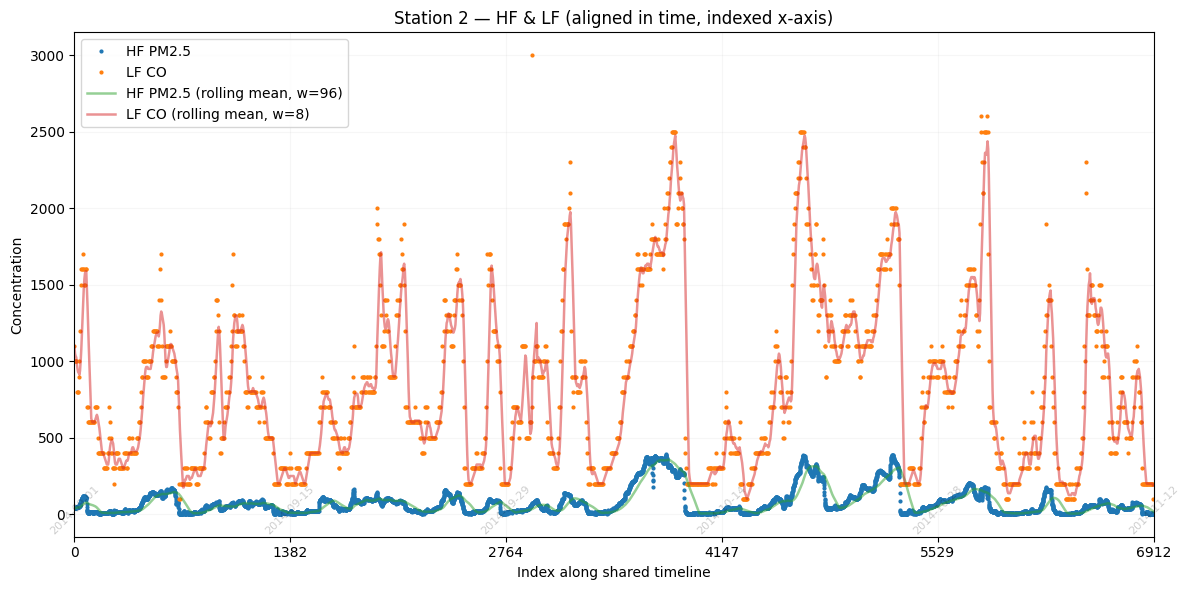

In [18]:
# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(hf_x, hf['PM2.5'], 'o', markersize=2, label='HF PM2.5')
plt.plot(lf_x, lf['CO'],    'o', markersize=2, label='LF CO')

# rolling mean lines on the same shared index (with transparency)
plt.plot(hf_x, hf_roll, linewidth=1.8, alpha=0.5,
         label=f'HF PM2.5 (rolling mean, w={hf_w})')
plt.plot(lf_x, lf_roll, linewidth=1.8, alpha=0.5,
         label=f'LF CO (rolling mean, w={lf_w})')

plt.xlabel('Index along shared timeline')
plt.ylabel('Concentration')
plt.title('Station 2 — HF & LF (aligned in time, indexed x-axis)')
plt.grid(alpha=0.1)
plt.margins(x=0)
plt.legend()

# (Optional) show a few date labels without switching x to datetime
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
tick_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_positions)
for x, lbl in zip(tick_positions, tick_labels):
    plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
             rotation=45, fontsize=8, alpha=0.2)

plt.tight_layout()
plt.show()


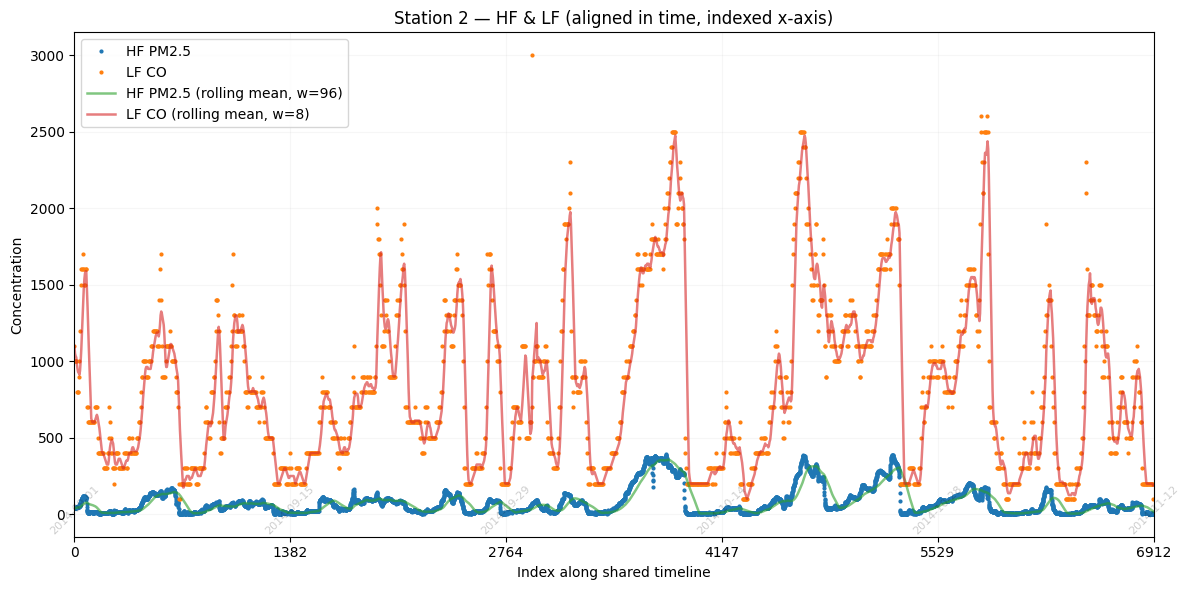

In [16]:
# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(hf_x, hf['PM2.5'], 'o', markersize=2, label='HF PM2.5')
plt.plot(lf_x, lf['CO'],    'o', markersize=2, label='LF CO')

# rolling mean lines on the same shared index (with transparency)
plt.plot(hf_x, hf_roll, linewidth=1.8, alpha=0.6,
         label=f'HF PM2.5 (rolling mean, w={hf_w})')
plt.plot(lf_x, lf_roll, linewidth=1.8, alpha=0.6,
         label=f'LF CO (rolling mean, w={lf_w})')

plt.xlabel('Index along shared timeline')
plt.ylabel('Concentration')
plt.title('Station 2 — HF & LF (aligned in time, indexed x-axis)')
plt.grid(alpha=0.1)
plt.margins(x=0)
plt.legend()

# (Optional) show a few date labels without switching x to datetime
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
tick_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_positions)
for x, lbl in zip(tick_positions, tick_labels):
    plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
             rotation=45, fontsize=8, alpha=0.2)

plt.tight_layout()
plt.show()


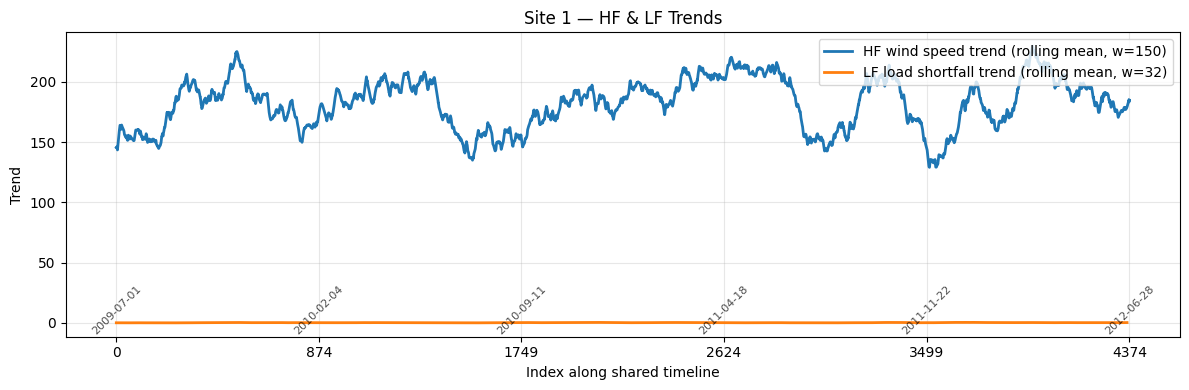

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load & parse ---
hf_path = '../src/TS_MTL/data/wind/wind-farm-2-hf.csv'
lf_path = '../src/TS_MTL/data/wind/wind-farm-2-lf.csv'
hf = pd.read_csv(hf_path, parse_dates=['Time']).sort_values('Time')
lf = pd.read_csv(lf_path, parse_dates=['Time']).sort_values('Time')

# --- Date filter ---
# min_date = pd.Timestamp("2015-01-01") #spain: "2015-01-01", "2016-05-14" 2014-09-01
# max_date = pd.Timestamp("2016-05-14")
# hf = hf[(hf['Time'] >= min_date) & (hf['Time'] <= max_date)]
# lf = lf[(lf['Time'] >= min_date) & (lf['Time'] <= max_date)]

# --- Shared time axis ---
time_union = np.sort(np.unique(np.concatenate([hf['Time'].values, lf['Time'].values])))
time_to_idx = {pd.Timestamp(t): i for i, t in enumerate(time_union)}
hf_x = hf['Time'].map(time_to_idx).to_numpy()
lf_x = lf['Time'].map(time_to_idx).to_numpy()

# --- Rolling means (centered) ---
hf_w, lf_w = 150, 32
hf_roll = hf['wd'].rolling(window=hf_w, min_periods=1, center=True).mean().to_numpy()
lf_roll = lf['wp'].rolling(window=lf_w, min_periods=1, center=True).mean().to_numpy()

# --- Plot trends only ---
plt.figure(figsize=(12, 4))
plt.plot(hf_x, hf_roll, linewidth=2, label=f'HF wind speed trend (rolling mean, w={hf_w})')
plt.plot(lf_x, lf_roll, linewidth=2, label=f'LF load shortfall trend (rolling mean, w={lf_w})')

plt.xlabel('Index along shared timeline')
plt.ylabel('Trend')
plt.title('Site 1 — HF & LF Trends')
plt.grid(alpha=0.3)
plt.legend(loc='upper right')

# Optional: index on axis + date annotations
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
plt.xticks(tick_positions, tick_positions)
date_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
ymin = plt.ylim()[0]
for x, lbl in zip(tick_positions, date_labels):
    plt.text(x, ymin, lbl, ha='center', va='bottom', rotation=45, fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()


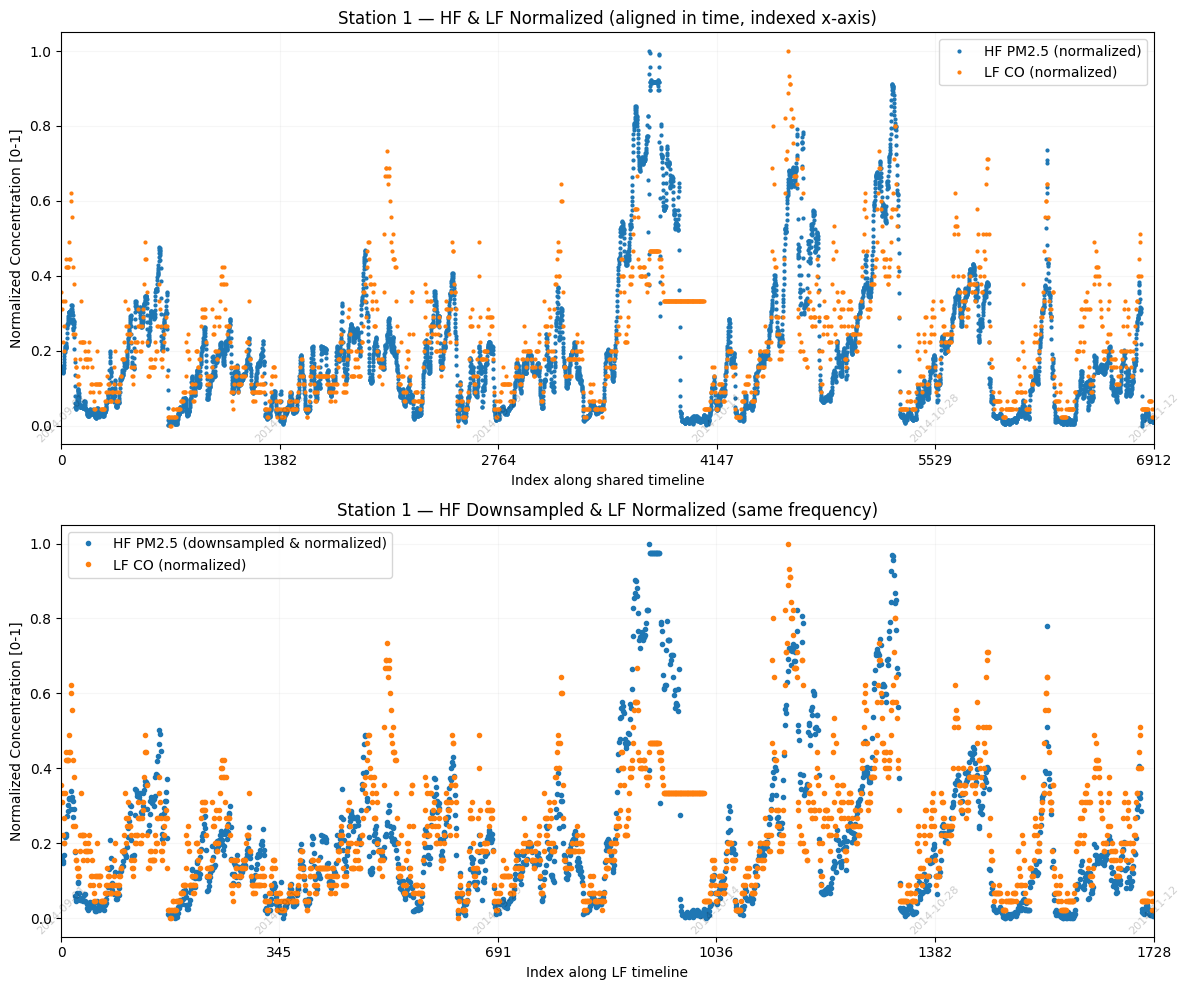

Original HF data points: 6913
LF data points: 1729
Downsampled HF data points: 1729
Downsampling ratio: 4.00:1

Original data ranges:
HF PM2.5: 0.86 - 474.58
LF CO: 100.00 - 4600.00
After normalization: 0.00 - 1.00 for both datasets


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load & parse ---
hf_path = '../src/TS_MTL/data/air_quality/station-1-hf.csv'
lf_path = '../src/TS_MTL/data/air_quality/station-1-lf.csv'
hf = pd.read_csv(hf_path, parse_dates=['Time']).sort_values('Time')
lf = pd.read_csv(lf_path, parse_dates=['Time']).sort_values('Time')

# --- Date filter ---
min_date = pd.Timestamp("2014-09-01") #spain: "2015-01-01", "2016-05-14" 2014-09-01
max_date = pd.Timestamp("2014-11-12")
hf = hf[(hf['Time'] >= min_date) & (hf['Time'] <= max_date)]
lf = lf[(lf['Time'] >= min_date) & (lf['Time'] <= max_date)]

# --- Normalize data for better comparison ---
# Min-max normalization to [0,1] range
hf_pm25_norm = (hf['PM2.5'] - hf['PM2.5'].min()) / (hf['PM2.5'].max() - hf['PM2.5'].min())
lf_co_norm = (lf['CO'] - lf['CO'].min()) / (lf['CO'].max() - lf['CO'].min())

# --- Shared time axis ---
time_union = np.sort(np.unique(np.concatenate([hf['Time'].values, lf['Time'].values])))
time_to_idx = {pd.Timestamp(t): i for i, t in enumerate(time_union)}
hf_x = hf['Time'].map(time_to_idx).to_numpy()
lf_x = lf['Time'].map(time_to_idx).to_numpy()

# --- ORIGINAL PLOT ---
plt.figure(figsize=(12, 10))

# First subplot: Original plot
plt.subplot(2, 1, 1)
plt.plot(hf_x, hf_pm25_norm, 'o', markersize=2, label='HF PM2.5 (normalized)')
plt.plot(lf_x, lf_co_norm, 'o', markersize=2, label='LF CO (normalized)')

plt.xlabel('Index along shared timeline')
plt.ylabel('Normalized Concentration [0-1]')
plt.title('Station 1 — HF & LF Normalized (aligned in time, indexed x-axis)')
plt.grid(alpha=0.1)
plt.margins(x=0)
plt.legend()

# (Optional) show a few date labels without switching x to datetime
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
tick_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_positions)
for x, lbl in zip(tick_positions, tick_labels):
    plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
             rotation=45, fontsize=8, alpha=0.2)

# --- DOWNSAMPLE HF DATA TO MATCH LF TIMESTAMPS ---
# Create a DataFrame with HF data indexed by time for easier resampling
hf_indexed = hf.set_index('Time')

# Downsample HF data to LF timestamps using nearest neighbor approach
hf_downsampled = hf_indexed.reindex(lf['Time'], method='nearest')

# Normalize downsampled data
hf_down_pm25_norm = (hf_downsampled['PM2.5'] - hf_downsampled['PM2.5'].min()) / (hf_downsampled['PM2.5'].max() - hf_downsampled['PM2.5'].min())
lf_co_norm_down = (lf['CO'] - lf['CO'].min()) / (lf['CO'].max() - lf['CO'].min())

# Create shared time index for the downsampled plot
lf_time_to_idx = {pd.Timestamp(t): i for i, t in enumerate(lf['Time'].values)}
hf_down_x = lf['Time'].map(lf_time_to_idx).to_numpy()
lf_down_x = lf['Time'].map(lf_time_to_idx).to_numpy()

# --- DOWNSAMPLED PLOT ---
plt.subplot(2, 1, 2)
plt.plot(hf_down_x, hf_down_pm25_norm, 'o', markersize=3, label='HF PM2.5 (downsampled & normalized)')
plt.plot(lf_down_x, lf_co_norm_down, 'o', markersize=3, label='LF CO (normalized)')

plt.xlabel('Index along LF timeline')
plt.ylabel('Normalized Concentration [0-1]')
plt.title('Station 1 — HF Downsampled & LF Normalized (same frequency)')
plt.grid(alpha=0.1)
plt.margins(x=0)
plt.legend()

# Show date labels for downsampled plot
tick_positions_down = np.linspace(0, len(lf['Time']) - 1, 6, dtype=int)
tick_labels_down = [lf['Time'].iloc[i].strftime('%Y-%m-%d') for i in tick_positions_down]
plt.xticks(tick_positions_down, tick_positions_down)
for x, lbl in zip(tick_positions_down, tick_labels_down):
    plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
             rotation=45, fontsize=8, alpha=0.2)

plt.tight_layout()
plt.show()

# --- Print some statistics about the downsampling and normalization ---
print(f"Original HF data points: {len(hf)}")
print(f"LF data points: {len(lf)}")
print(f"Downsampled HF data points: {len(hf_downsampled)}")
print(f"Downsampling ratio: {len(hf)/len(lf):.2f}:1")
print(f"\nOriginal data ranges:")
print(f"HF PM2.5: {hf['PM2.5'].min():.2f} - {hf['PM2.5'].max():.2f}")
print(f"LF CO: {lf['CO'].min():.2f} - {lf['CO'].max():.2f}")
print(f"After normalization: 0.00 - 1.00 for both datasets")

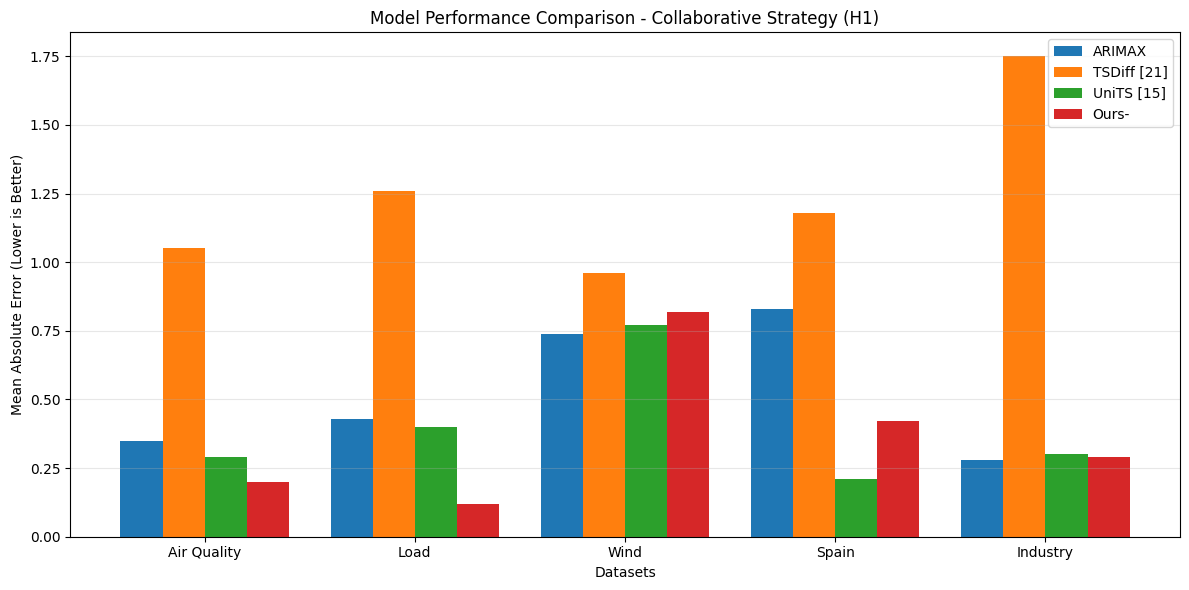

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = ['ARIMAX', 'TSDiff [21]', 'UniTS [15]', 'Ours-']
datasets = ['Air Quality', 'Load', 'Wind', 'Spain', 'Industry']

# Performance values for each model across datasets
performance = {
    'ARIMAX': [0.35, 0.43, 0.74, 0.83, 0.28],
    'TSDiff [21]': [1.05, 1.26, 0.96, 1.18, 1.75],
    'UniTS [15]': [0.29, 0.40, 0.77, 0.21, 0.30],
    'Ours-': [0.20, 0.12, 0.82, 0.42, 0.29]
}

# Create the plot
plt.figure(figsize=(12, 6))

# Set up bar positions
x = np.arange(len(datasets))
width = 0.2

# Plot bars for each model
for i, model in enumerate(models):
    plt.bar(x + i * width, performance[model], width, label=model)

# Customize the plot
plt.xlabel('Datasets')
plt.ylabel('Mean Absolute Error (Lower is Better)')
plt.title('Model Performance Comparison - Collaborative Strategy (H1)')
plt.xticks(x + width * 1.5, datasets)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

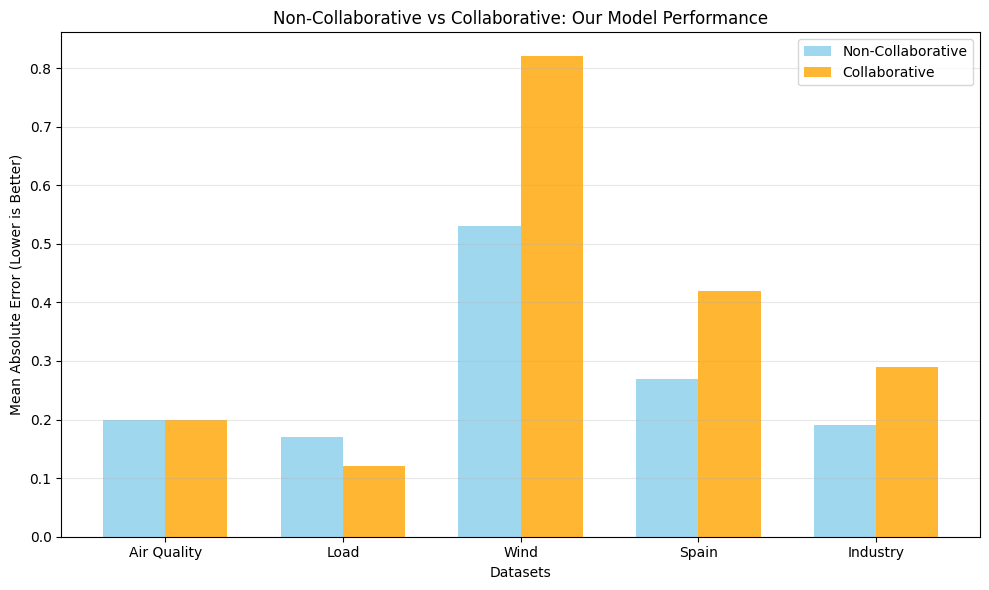

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = ['ARIMAX', 'TSDiff', 'UniTS', 'Ours-']
datasets = ['Air Quality', 'Load', 'Wind', 'Spain', 'Industry']

# Non-Collaborative performance
non_collaborative = {
    'ARIMAX': [0.33, 0.47, 0.82, 1.01, 0.24],
    'TSDiff': [1.89, 1.26, 1.07, 1.37, 2.14],
    'UniTS': [0.30, 0.47, 0.70, 0.23, 0.51],
    'Ours-': [0.20, 0.17, 0.53, 0.27, 0.19]
}

# Collaborative performance
collaborative = {
    'ARIMAX': [0.35, 0.43, 0.74, 0.83, 0.28],
    'TSDiff': [1.05, 1.26, 0.96, 1.18, 1.75],
    'UniTS': [0.29, 0.40, 0.77, 0.21, 0.30],
    'Ours-': [0.20, 0.12, 0.82, 0.42, 0.29]
}

# Create simple comparison plot for "Ours" model
plt.figure(figsize=(10, 6))

x = np.arange(len(datasets))
width = 0.35

bars1 = plt.bar(x - width/2, non_collaborative['Ours-'], width, 
               label='Non-Collaborative', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, collaborative['Ours-'], width,
               label='Collaborative', alpha=0.8, color='orange')

plt.xlabel('Datasets')
plt.ylabel('Mean Absolute Error (Lower is Better)')
plt.title('Non-Collaborative vs Collaborative: Our Model Performance')
plt.xticks(x, datasets)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

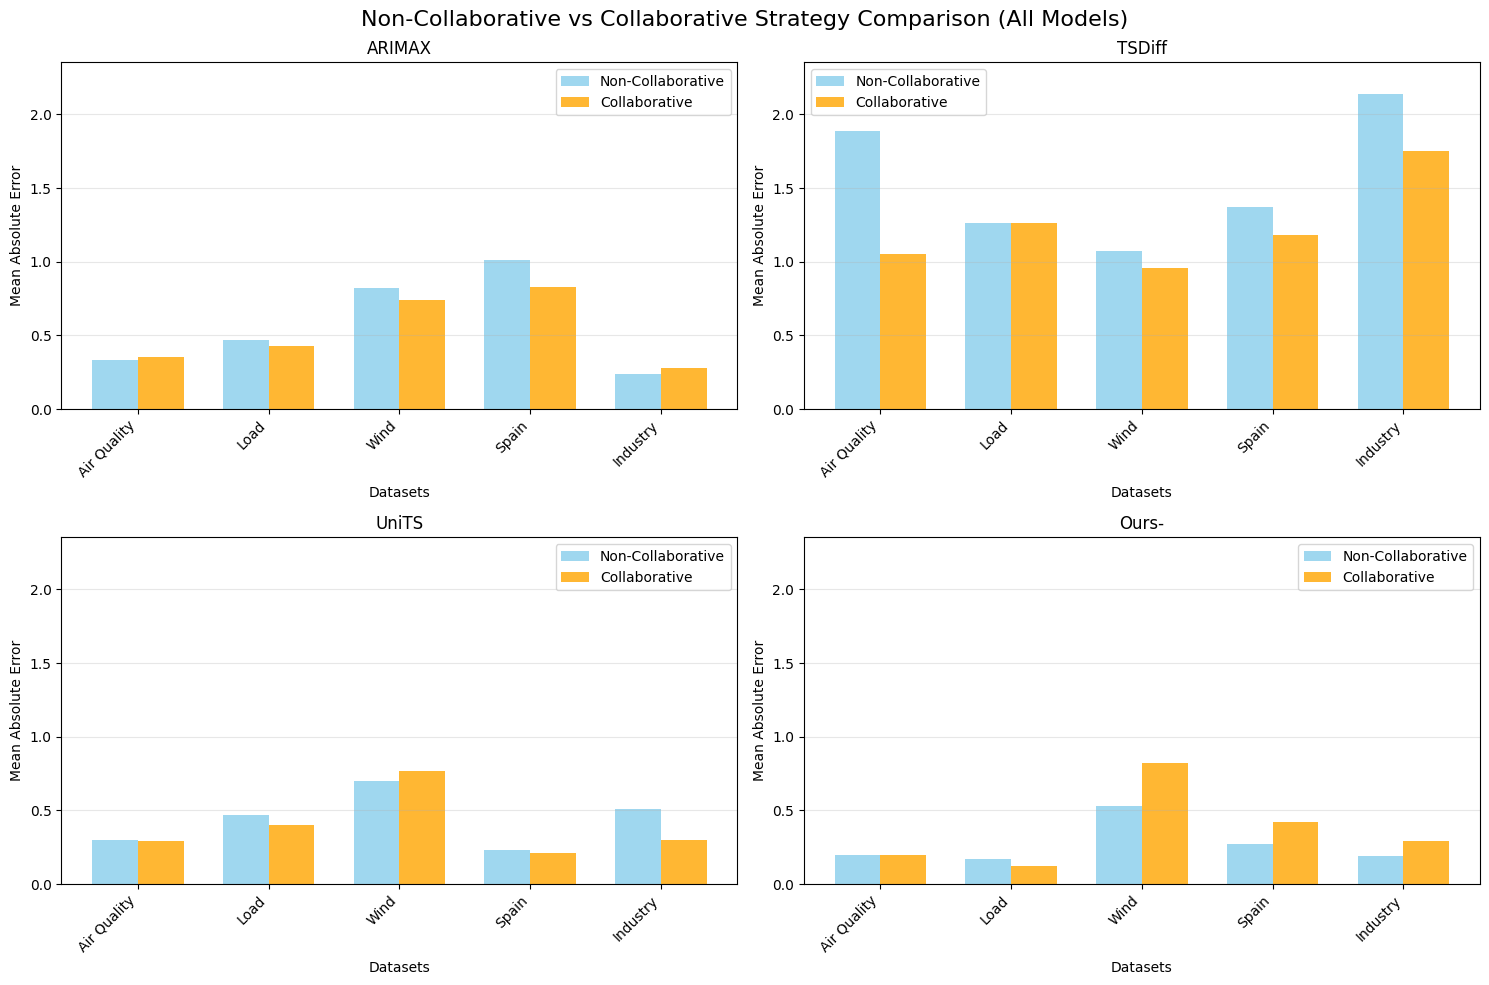

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = ['ARIMAX', 'TSDiff', 'UniTS', 'Ours-']
datasets = ['Air Quality', 'Load', 'Wind', 'Spain', 'Industry']

# Non-Collaborative performance
non_collaborative = {
    'ARIMAX': [0.33, 0.47, 0.82, 1.01, 0.24],
    'TSDiff': [1.89, 1.26, 1.07, 1.37, 2.14],
    'UniTS': [0.30, 0.47, 0.70, 0.23, 0.51],
    'Ours-': [0.20, 0.17, 0.53, 0.27, 0.19]
}

# Collaborative performance
collaborative = {
    'ARIMAX': [0.35, 0.43, 0.74, 0.83, 0.28],
    'TSDiff': [1.05, 1.26, 0.96, 1.18, 1.75],
    'UniTS': [0.29, 0.40, 0.77, 0.21, 0.30],
    'Ours-': [0.20, 0.12, 0.82, 0.42, 0.29]
}

# Create comparison plot for all models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Find global min and max for consistent y-axis scaling
all_values = []
for model in models:
    all_values.extend(non_collaborative[model])
    all_values.extend(collaborative[model])
y_min = 0
y_max = max(all_values) * 1.1  # Add 10% padding

# Plot for each model
for idx, model in enumerate(models):
    ax = axes[idx]
    
    x = np.arange(len(datasets))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, non_collaborative[model], width, 
                   label='Non-Collaborative', alpha=0.8, color='skyblue')
    bars2 = ax.bar(x + width/2, collaborative[model], width,
                   label='Collaborative', alpha=0.8, color='orange')
    
    ax.set_xlabel('Datasets')
    ax.set_ylabel('Mean Absolute Error')
    ax.set_title(f'{model}')
    ax.set_xticks(x)
    ax.set_xticklabels(datasets, rotation=45, ha='right')
    ax.set_ylim(y_min, y_max)  # Set consistent y-axis scale
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Non-Collaborative vs Collaborative Strategy Comparison (All Models)', fontsize=16)
plt.tight_layout()
plt.show()

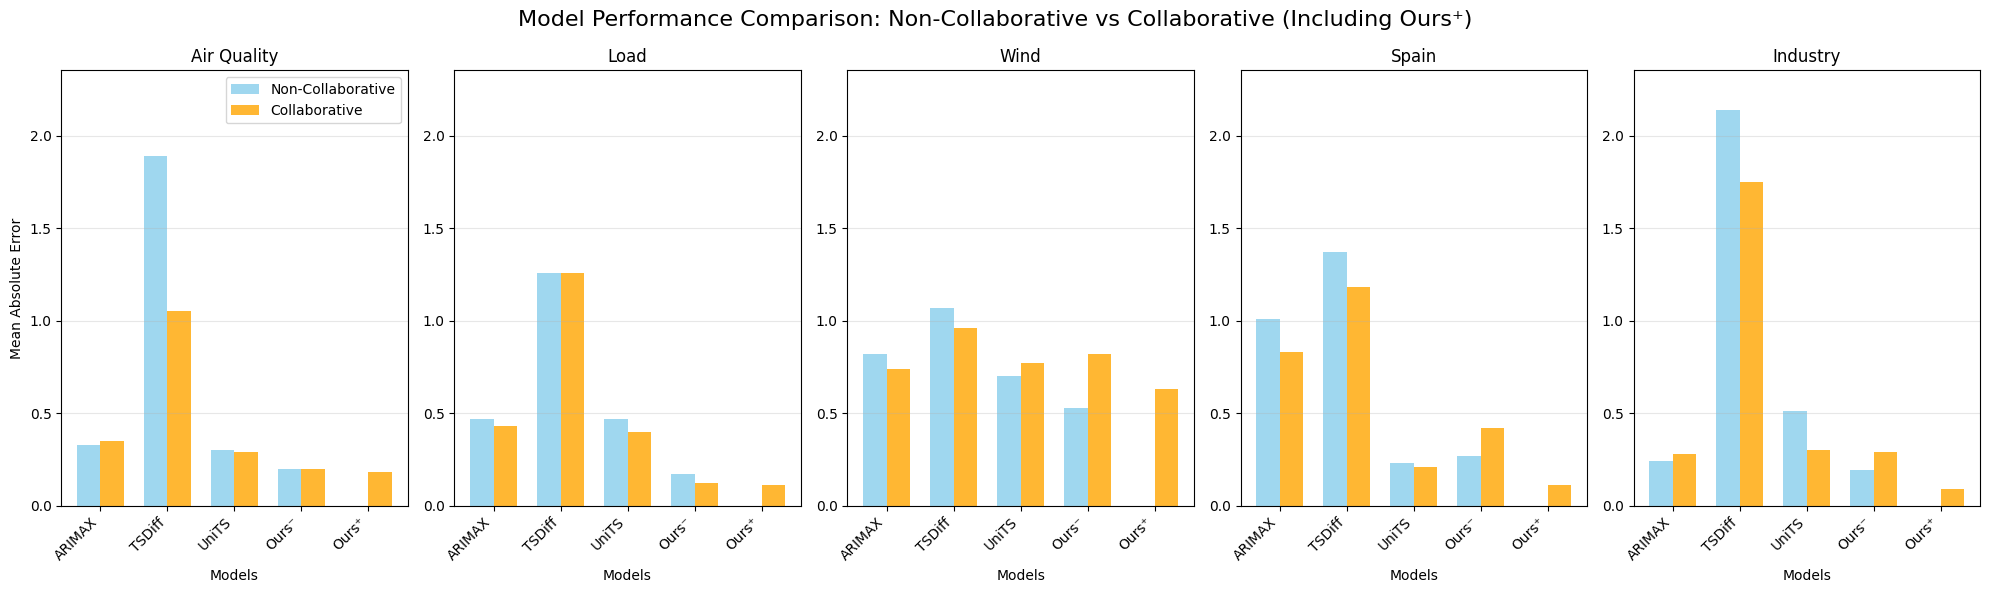

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the updated table
datasets = ['Air Quality', 'Load', 'Wind', 'Spain', 'Industry']

# Non-Collaborative performance
non_collaborative = {
    'ARIMAX': [0.33, 0.47, 0.82, 1.01, 0.24],
    'TSDiff': [1.89, 1.26, 1.07, 1.37, 2.14],
    'UniTS': [0.30, 0.47, 0.70, 0.23, 0.51],
    'Ours⁻': [0.20, 0.17, 0.53, 0.27, 0.19]
}

# Collaborative performance
collaborative = {
    'ARIMAX': [0.35, 0.43, 0.74, 0.83, 0.28],
    'TSDiff': [1.05, 1.26, 0.96, 1.18, 1.75],
    'UniTS': [0.29, 0.40, 0.77, 0.21, 0.30],
    'Ours⁻': [0.20, 0.12, 0.82, 0.42, 0.29],
    'Ours⁺': [0.18, 0.11, 0.63, 0.11, 0.09]
}

# Create comprehensive comparison plot including Ours+
fig, axes = plt.subplots(1, len(datasets), figsize=(20, 6))

# Find global min and max for consistent y-axis scaling
all_values = []
for model in ['ARIMAX', 'TSDiff', 'UniTS', 'Ours⁻']:
    all_values.extend(non_collaborative[model])
    if model == 'TSDiff':
        all_values.extend(collaborative['TSDiff'])
    else:
        all_values.extend(collaborative[model])
all_values.extend(collaborative['Ours⁺'])
y_min = 0
y_max = max(all_values) * 1.1

# Plot for each dataset
for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    
    # Models and their values for this dataset
    models_nc = ['ARIMAX', 'TSDiff', 'UniTS', 'Ours⁻']
    models_collab = ['ARIMAX', 'TSDiff', 'UniTS', 'Ours⁻', 'Ours⁺']
    
    nc_values = [non_collaborative[model][idx] for model in models_nc]
    collab_values = [collaborative['ARIMAX'][idx], collaborative['TSDiff'][idx], 
                    collaborative['UniTS'][idx], collaborative['Ours⁻'][idx],
                    collaborative['Ours⁺'][idx]]
    
    x_nc = np.arange(len(models_nc))
    x_collab = np.arange(len(models_collab))
    width = 0.35
    
    # Plot non-collaborative (offset left)
    bars1 = ax.bar(x_nc - width/2, nc_values, width, 
                   label='Non-Collaborative' if idx == 0 else "", 
                   alpha=0.8, color='skyblue')
    
    # Plot collaborative (offset right, include Ours+)
    bars2 = ax.bar(x_collab + width/2, collab_values, width,
                   label='Collaborative' if idx == 0 else "", 
                   alpha=0.8, color='orange')
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Mean Absolute Error' if idx == 0 else '')
    ax.set_title(f'{dataset}')
    ax.set_xticks(x_collab)
    ax.set_xticklabels(['ARIMAX', 'TSDiff', 'UniTS', 'Ours⁻', 'Ours⁺'], rotation=45, ha='right')
    ax.set_ylim(y_min, y_max)
    ax.grid(axis='y', alpha=0.3)
    
    if idx == 0:
        ax.legend()

plt.suptitle('Model Performance Comparison: Non-Collaborative vs Collaborative (Including Ours⁺)', fontsize=16)
plt.tight_layout()
plt.show()

Loading data...
Loaded 8763 records from Site 1
Loaded 8763 records from Site 2
After date filtering:
  Site 1: 8763 -> 468 records
  Site 2: 8763 -> 468 records


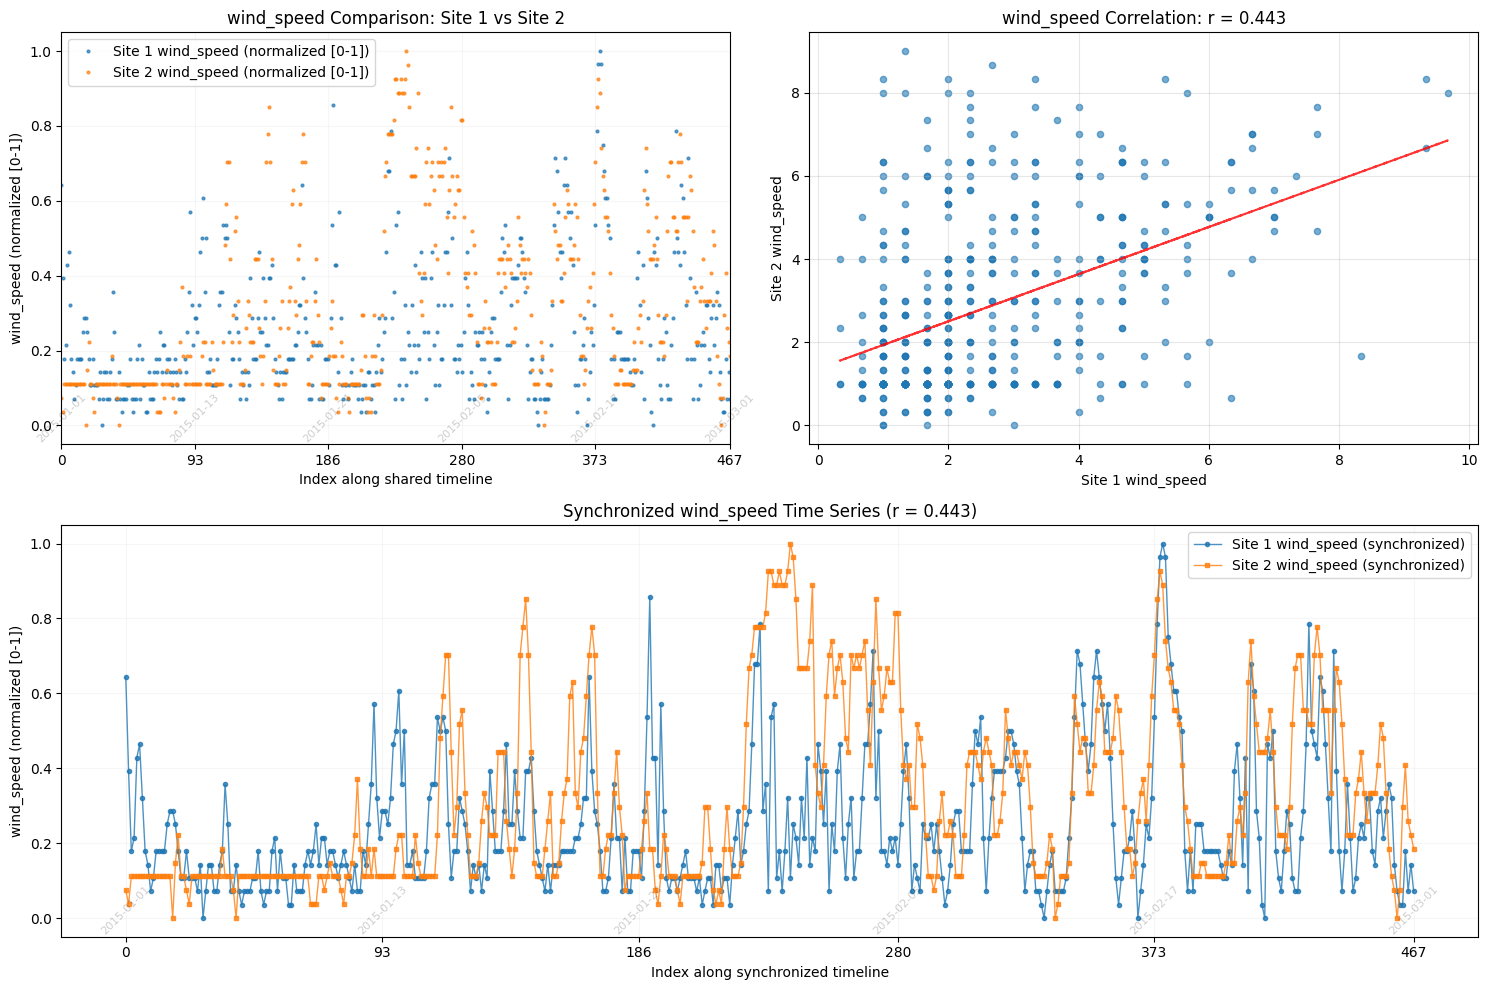

CORRELATION ANALYSIS BETWEEN SITES
Site 1 data points: 468
Site 2 data points: 468
Common timestamps: 468
Correlation coefficient: 0.4431
Correlation strength: Weak positive correlation

Site 1 wind_speed range: 0.33 - 9.67
Site 2 wind_speed range: 0.00 - 9.00
Site 1 wind_speed mean: 2.64
Site 2 wind_speed mean: 2.87

Original data ranges:
Site 1 wind_speed: 0.33 - 9.67
Site 2 wind_speed: 0.00 - 9.00
After normalization: 0.00 - 1.00 for both sites

Configuration used:
  Time column: Time
  Value column: wind_speed
  Normalization: Enabled
  Date range: 2015-01-01 to 2015-03-01


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# CONFIGURATION - MODIFY THESE SETTINGS FOR YOUR DATA
# =============================================================================

# File paths
SITE1_PATH = '../src/TS_MTL/data/spain_mf/Barcelona-hf.csv' #'../src/TS_MTL/data/wind/wind-farm-2-hf.csv'
SITE2_PATH = '../src/TS_MTL/data/spain_mf/Madrid-hf.csv' #'../src/TS_MTL/data/wind/wind-farm-3-hf.csv'

# Column names in your CSV files
TIME_COLUMN = 'Time'           # Name of the timestamp column
VALUE_COLUMN = 'wind_speed'         # Name of the column you want to analyze
SITE1_NAME = 'Site 1'          # Display name for first site
SITE2_NAME = 'Site 2'          # Display name for second site

# Date filtering (set to None to use all data)
MIN_DATE = "2015-01-01" #"2014-09-01"        # Format: "YYYY-MM-DD" or None
MAX_DATE = "2015-03-01" #"2014-11-12"        # Format: "YYYY-MM-DD" or None

# Plot settings
NORMALIZE_DATA = True          # Whether to normalize data to [0,1] range
SHOW_TREND_LINE = True         # Whether to show trend line in scatter plot

# =============================================================================
# MAIN CODE - NO NEED TO MODIFY BELOW THIS LINE
# =============================================================================

# --- Load & parse data from two different sites ---
print("Loading data...")
site1 = pd.read_csv(SITE1_PATH, parse_dates=[TIME_COLUMN]).sort_values(TIME_COLUMN)
site2 = pd.read_csv(SITE2_PATH, parse_dates=[TIME_COLUMN]).sort_values(TIME_COLUMN)

print(f"Loaded {len(site1)} records from {SITE1_NAME}")
print(f"Loaded {len(site2)} records from {SITE2_NAME}")

# Check if specified columns exist
if VALUE_COLUMN not in site1.columns:
    raise ValueError(f"Column '{VALUE_COLUMN}' not found in {SITE1_NAME} data. Available columns: {list(site1.columns)}")
if VALUE_COLUMN not in site2.columns:
    raise ValueError(f"Column '{VALUE_COLUMN}' not found in {SITE2_NAME} data. Available columns: {list(site2.columns)}")

# --- Date filter (optional) ---
if MIN_DATE or MAX_DATE:
    original_site1_len = len(site1)
    original_site2_len = len(site2)
    
    if MIN_DATE:
        min_date = pd.Timestamp(MIN_DATE)
        site1 = site1[site1[TIME_COLUMN] >= min_date]
        site2 = site2[site2[TIME_COLUMN] >= min_date]
    
    if MAX_DATE:
        max_date = pd.Timestamp(MAX_DATE)
        site1 = site1[site1[TIME_COLUMN] <= max_date]
        site2 = site2[site2[TIME_COLUMN] <= max_date]
    
    print(f"After date filtering:")
    print(f"  {SITE1_NAME}: {original_site1_len} -> {len(site1)} records")
    print(f"  {SITE2_NAME}: {original_site2_len} -> {len(site2)} records")

# --- Normalize data for better comparison (optional) ---
if NORMALIZE_DATA:
    site1_values_norm = (site1[VALUE_COLUMN] - site1[VALUE_COLUMN].min()) / (site1[VALUE_COLUMN].max() - site1[VALUE_COLUMN].min())
    site2_values_norm = (site2[VALUE_COLUMN] - site2[VALUE_COLUMN].min()) / (site2[VALUE_COLUMN].max() - site2[VALUE_COLUMN].min())
    ylabel_suffix = " (normalized [0-1])"
else:
    site1_values_norm = site1[VALUE_COLUMN]
    site2_values_norm = site2[VALUE_COLUMN]
    ylabel_suffix = ""

# --- Shared time axis ---
time_union = np.sort(np.unique(np.concatenate([site1[TIME_COLUMN].values, site2[TIME_COLUMN].values])))
time_to_idx = {pd.Timestamp(t): i for i, t in enumerate(time_union)}
site1_x = site1[TIME_COLUMN].map(time_to_idx).to_numpy()
site2_x = site2[TIME_COLUMN].map(time_to_idx).to_numpy()

# --- CORRELATION ANALYSIS PLOTS ---
plt.figure(figsize=(15, 10))

# First subplot: Time series comparison
plt.subplot(2, 2, 1)
plt.plot(site1_x, site1_values_norm, 'o', markersize=2, label=f'{SITE1_NAME} {VALUE_COLUMN}{ylabel_suffix}', alpha=0.7)
plt.plot(site2_x, site2_values_norm, 'o', markersize=2, label=f'{SITE2_NAME} {VALUE_COLUMN}{ylabel_suffix}', alpha=0.7)

plt.xlabel('Index along shared timeline')
plt.ylabel(f'{VALUE_COLUMN}{ylabel_suffix}')
plt.title(f'{VALUE_COLUMN} Comparison: {SITE1_NAME} vs {SITE2_NAME}')
plt.grid(alpha=0.1)
plt.margins(x=0)
plt.legend()

# Show a few date labels
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
tick_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_positions)
for x, lbl in zip(tick_positions, tick_labels):
    plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
             rotation=45, fontsize=8, alpha=0.2)

# Second subplot: Scatter plot for correlation
plt.subplot(2, 2, 2)

# Find common timestamps for correlation analysis
common_times = set(site1[TIME_COLUMN]).intersection(set(site2[TIME_COLUMN]))
if len(common_times) > 0:
    # Filter data to common timestamps
    site1_common = site1[site1[TIME_COLUMN].isin(common_times)].sort_values(TIME_COLUMN)
    site2_common = site2[site2[TIME_COLUMN].isin(common_times)].sort_values(TIME_COLUMN)
    
    # Calculate correlation
    correlation = np.corrcoef(site1_common[VALUE_COLUMN], site2_common[VALUE_COLUMN])[0, 1]
    
    plt.scatter(site1_common[VALUE_COLUMN], site2_common[VALUE_COLUMN], alpha=0.6, s=20)
    plt.xlabel(f'{SITE1_NAME} {VALUE_COLUMN}')
    plt.ylabel(f'{SITE2_NAME} {VALUE_COLUMN}')
    plt.title(f'{VALUE_COLUMN} Correlation: r = {correlation:.3f}')
    plt.grid(alpha=0.3)
    
    # Add trend line
    if SHOW_TREND_LINE:
        z = np.polyfit(site1_common[VALUE_COLUMN], site2_common[VALUE_COLUMN], 1)
        p = np.poly1d(z)
        plt.plot(site1_common[VALUE_COLUMN], p(site1_common[VALUE_COLUMN]), "r--", alpha=0.8)
else:
    plt.text(0.5, 0.5, 'No common timestamps\nfor correlation analysis', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title(f'{VALUE_COLUMN} Correlation: No common data')
    correlation = None

# Third subplot: Synchronized time series (downsampled to common frequency)
plt.subplot(2, 2, (3, 4))

if len(common_times) > 0:
    # Create synchronized time index
    common_time_to_idx = {pd.Timestamp(t): i for i, t in enumerate(sorted(common_times))}
    site1_sync_x = site1_common[TIME_COLUMN].map(common_time_to_idx).to_numpy()
    site2_sync_x = site2_common[TIME_COLUMN].map(common_time_to_idx).to_numpy()
    
    # Get synchronized data (normalized or not based on settings)
    if NORMALIZE_DATA:
        site1_sync_values = (site1_common[VALUE_COLUMN] - site1_common[VALUE_COLUMN].min()) / (site1_common[VALUE_COLUMN].max() - site1_common[VALUE_COLUMN].min())
        site2_sync_values = (site2_common[VALUE_COLUMN] - site2_common[VALUE_COLUMN].min()) / (site2_common[VALUE_COLUMN].max() - site2_common[VALUE_COLUMN].min())
    else:
        site1_sync_values = site1_common[VALUE_COLUMN]
        site2_sync_values = site2_common[VALUE_COLUMN]
    
    plt.plot(site1_sync_x, site1_sync_values, 'o-', markersize=3, linewidth=1, 
             label=f'{SITE1_NAME} {VALUE_COLUMN} (synchronized)', alpha=0.8)
    plt.plot(site2_sync_x, site2_sync_values, 's-', markersize=3, linewidth=1, 
             label=f'{SITE2_NAME} {VALUE_COLUMN} (synchronized)', alpha=0.8)
    
    plt.xlabel('Index along synchronized timeline')
    plt.ylabel(f'{VALUE_COLUMN}{ylabel_suffix}')
    plt.title(f'Synchronized {VALUE_COLUMN} Time Series (r = {correlation:.3f})')
    plt.grid(alpha=0.1)
    plt.legend()
    
    # Show date labels for synchronized plot
    tick_positions_sync = np.linspace(0, len(common_times) - 1, 6, dtype=int)
    tick_labels_sync = [sorted(common_times)[i].strftime('%Y-%m-%d') for i in tick_positions_sync]
    plt.xticks(tick_positions_sync, tick_positions_sync)
    for x, lbl in zip(tick_positions_sync, tick_labels_sync):
        plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
                 rotation=45, fontsize=8, alpha=0.2)
else:
    plt.text(0.5, 0.5, 'No synchronized data available', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title(f'Synchronized {VALUE_COLUMN} Time Series: No data')

plt.tight_layout()
plt.show()

# --- Print correlation analysis statistics ---
print("=" * 60)
print("CORRELATION ANALYSIS BETWEEN SITES")
print("=" * 60)

print(f"{SITE1_NAME} data points: {len(site1)}")
print(f"{SITE2_NAME} data points: {len(site2)}")
print(f"Common timestamps: {len(common_times) if len(common_times) > 0 else 0}")

if len(common_times) > 0 and correlation is not None:
    print(f"Correlation coefficient: {correlation:.4f}")
    
    # Interpretation of correlation
    if abs(correlation) >= 0.8:
        strength = "Strong"
    elif abs(correlation) >= 0.5:
        strength = "Moderate"
    elif abs(correlation) >= 0.3:
        strength = "Weak"
    else:
        strength = "Very weak"
    
    direction = "positive" if correlation > 0 else "negative"
    print(f"Correlation strength: {strength} {direction} correlation")
    
    # Additional statistics
    print(f"\n{SITE1_NAME} {VALUE_COLUMN} range: {site1_common[VALUE_COLUMN].min():.2f} - {site1_common[VALUE_COLUMN].max():.2f}")
    print(f"{SITE2_NAME} {VALUE_COLUMN} range: {site2_common[VALUE_COLUMN].min():.2f} - {site2_common[VALUE_COLUMN].max():.2f}")
    print(f"{SITE1_NAME} {VALUE_COLUMN} mean: {site1_common[VALUE_COLUMN].mean():.2f}")
    print(f"{SITE2_NAME} {VALUE_COLUMN} mean: {site2_common[VALUE_COLUMN].mean():.2f}")
else:
    print("No overlapping timestamps found for correlation analysis")
    print("Sites may have different measurement schedules or time periods")

print(f"\nOriginal data ranges:")
print(f"{SITE1_NAME} {VALUE_COLUMN}: {site1[VALUE_COLUMN].min():.2f} - {site1[VALUE_COLUMN].max():.2f}")
print(f"{SITE2_NAME} {VALUE_COLUMN}: {site2[VALUE_COLUMN].min():.2f} - {site2[VALUE_COLUMN].max():.2f}")

if NORMALIZE_DATA:
    print(f"After normalization: 0.00 - 1.00 for both sites")

print(f"\nConfiguration used:")
print(f"  Time column: {TIME_COLUMN}")
print(f"  Value column: {VALUE_COLUMN}")
print(f"  Normalization: {'Enabled' if NORMALIZE_DATA else 'Disabled'}")
print(f"  Date range: {MIN_DATE or 'All'} to {MAX_DATE or 'All'}")